In [1]:
#libraries
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Game of Life with stochastic elements added

N = 300
n_iter = 20000

x_step = np.array([random.choice([-1,0,1]), random.choice([-1,0,1]),
                  random.choice([-1,0,1]), random.choice([-1,0,1])])
                   
y_step = np.array([random.choice([-1,0,1]), random.choice([-1,0,1]),
                  random.choice([-1,0,1]), random.choice([-1,0,1])])

image = np.zeros([N,N], dtype='int')

highway = []
ix = N//4
iy = N//4
direction = 1
    
for iteration in range(0, n_iter):
    ix += x_step.any()
    iy += y_step.any()
        
    ix=(N+ix) % N
    iy=(N+iy) % N
        
    if image[iy,ix] == 1:
        update=random.choice([0,-1])
        direction+=1
        direction % 4
        highway.append(update)
    else:
        update=random.choice([0,1])
        direction-=1
        direction=(4+direction) % 4
        highway.append(update)
        image[iy,ix]+=update

In [3]:
highway1 = np.array_split(highway, 1000)

In [4]:
len(highway1)

1000

In [5]:
a = []

#make the dataset    
#cossims of highway1 to measure the similarity of each path, each goal among varied beings
for k in range(0,100):
    for i,j in enumerate(highway1):
        a.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))

/var/folders/yr/874s9zz951xblfgr49l65dlh0000gn/T/ipykernel_57606/4269060745.py:7: RuntimeWarning: invalid value encountered in divide
  a.append(np.dot(i,j)/((linalg.norm(i))*(linalg.norm(j))))


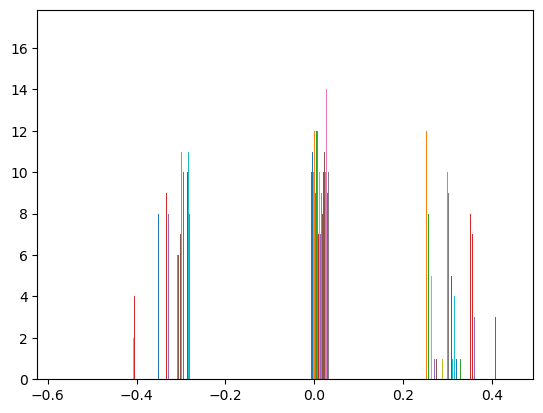

In [6]:
plt.hist(a[1:100], bins = 20)
plt.show()
#original goals--calculable below

In [7]:
#TRAIN

a_trainrange = a[1:100]

X = a_trainrange
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


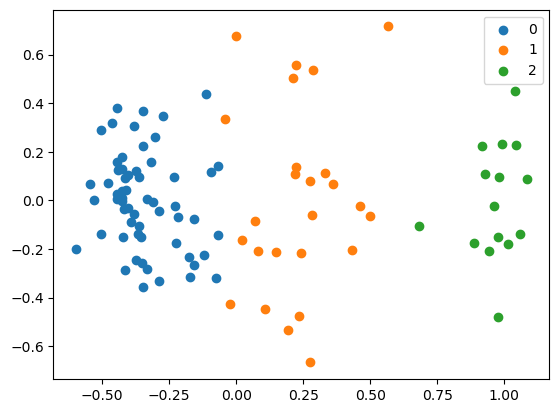

In [8]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [9]:
#TEST--need pred

Y = np.array(a[100:400])
pca = PCA(2)
 
#Transform the data
dftest = pca.fit_transform(Y)
 
dftest.shape


kmeanstest = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(dftest)

labeltest = kmeanstest.fit_predict(dftest)
 
print(labeltest)

[0 2 2 2 2 1 1 1 1 0 2 0 0 0 1 1 2 2 1 1 0 1 0 2 2 1 0 0 0 1 2 0 1 2 2 2 2
 0 2 1 1 2 1 0 0 2 1 1 0 2 0 2 2 1 2 0 2 2 1 1 1 2 2 0 1 2 1 0 0 0 1 2 1 1
 0 0 0 2 2 0 0 1 2 2 1 0 1 1 2 2 2 0 0 1 2 0 1 0 2 1 2 0 0 0 0 1 1 1 0 2 1
 1 1 2 1 1 1 0 1 0 1 0 1 0 2 0 0 0 2 1 1 0 2 2 0 2 2 2 1 2 2 0 2 0 1 0 0 1
 1 1 0 1 0 0 0 2 0 2 2 1 2 0 1 1 1 0 0 2 1 0 0 0 0 2 0 2 1 0 2 0 1 2 1 1 0
 0 1 1 2 2 0 0 0 0 0 1 0 1 0 2 1 2 0 0 1 2 1 2 2 0 1 0 0 0 0 1 2 2 1 0 1 2
 1 1 0 1 0 2 1 2 1 2 0 0 0 0 0 0 0 2 2 0 2 1 2 0 2 1 1 2 2 1 0 0 2 2 1 1 0
 1 0 0 2 0 1 1 1 1 0 2 2 1 2 1 0 0 1 1 1 2 1 0 0 1 0 0 1 2 1 0 2 1 2 1 2 0
 0 1 1 1]


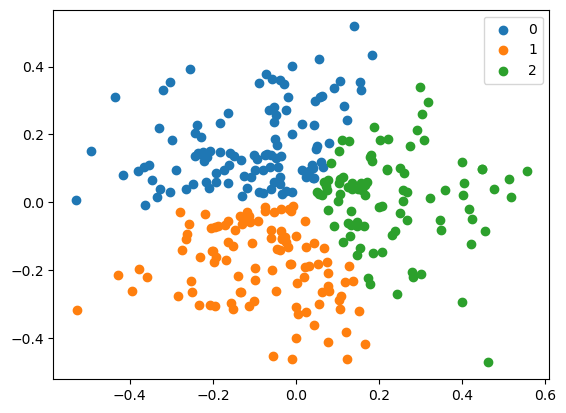

In [10]:
#PLOT TEST

#Getting unique labels
 
u_labelstest = np.unique(labeltest)
 
#plotting the results:
 
for i in u_labelstest:
    plt.scatter(dftest[labeltest == i , 0] , dftest[labeltest == i , 1] , label = i)
plt.legend()
plt.show()

#3 goals among type(s) of agent

In [11]:
#introduce noise
clean_signal = pd.DataFrame(a_trainrange, dtype=float)
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [99, 20])
signal = clean_signal + noise

signal_array = np.array(signal)

In [12]:
embed = []
for s in signal_array:
    for z in a_trainrange:
        embed.append(np.dot(s,z)/((linalg.norm(s))*(linalg.norm(z))))

In [13]:
clean_noise = pd.DataFrame([a_trainrange, signal_array])

In [14]:
clean_noise = clean_noise.T

In [15]:
clean_noise #train here

,0,1
0,"[0.31622776601683794, 0.0, 0.0, 0.316227766016...","[0.3562320595494452, -0.0997377642785443, 0.05..."
1,"[0.31622776601683794, 0.0, 0.31622776601683794...","[0.32187748075993083, 0.14746443154315508, 0.2..."
2,"[0.0, 0.0, 0.31622776601683794, 0.0, 0.0, 0.0,...","[0.10512968284561629, 0.018502167849384802, 0...."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35355339...","[0.04266352323315923, -0.2725170656175306, 0.0..."
4,"[0.3015113445777637, 0.3015113445777637, 0.301...","[0.32135207075669897, 0.27832488205259653, 0.2..."
...,...,...
94,"[0.0, 0.0, 0.0, 0.0, 0.0, -0.35355339059327373...","[-0.018516371393643444, 0.06678445732185923, -..."
95,"[-0.3333333333333333, 0.0, 0.0, -0.33333333333...","[-0.2945012066073369, 0.05432907959428297, 0.0..."
96,"[0.0, -0.3535533905932738, 0.0, 0.0, -0.353553...","[-0.10463181505886326, -0.2758894559750152, 0...."
97,"[-0.3162277660168379, 0.0, -0.3162277660168379...","[-0.3107850987563485, -0.050333974798024234, -..."


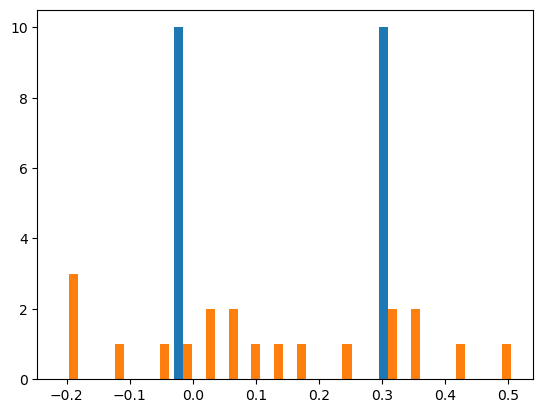

In [16]:
#plot noised data
plt.hist(clean_noise.iloc[9], bins = 20)#any iloc
plt.show()
#showing goal divergence from disruptive noise

In [17]:
clean_noise[1].iloc[9]

array([ 0.06081856,  0.5075776 ,  0.24311051, -0.13570838,  0.33711717,
        0.16470199,  0.31395613,  0.02874202, -0.21413645,  0.08597444,
       -0.01982795,  0.00576289,  0.31844307, -0.2138555 ,  0.13887983,
       -0.03556361,  0.43041822,  0.33938791, -0.18369168,  0.06504656])

In [18]:
#start with just one row
goal_reach_test = clean_noise.iloc[9]

the_goal = goal_reach_test[0]
the_divergence = goal_reach_test[1]

(array([3., 0., 1., 0., 1., 1., 2., 2., 1., 1., 1., 0., 1., 0., 2., 2., 0.,
        1., 0., 1.]),
 array([-0.21413645, -0.17805075, -0.14196504, -0.10587934, -0.06979364,
        -0.03370794,  0.00237777,  0.03846347,  0.07454917,  0.11063487,
         0.14672058,  0.18280628,  0.21889198,  0.25497768,  0.29106339,
         0.32714909,  0.36323479,  0.39932049,  0.4354062 ,  0.4714919 ,
         0.5075776 ]),
 <BarContainer object of 20 artists>)

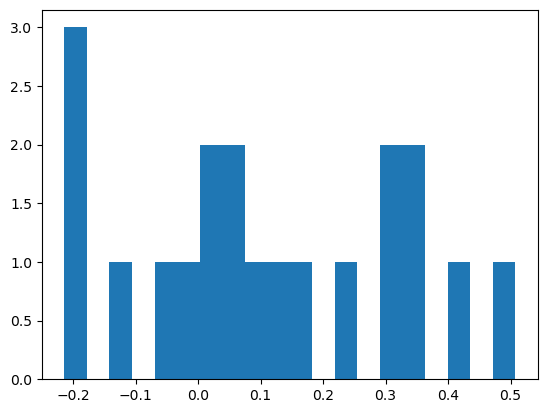

In [19]:
plt.hist(the_divergence, bins = 20)#any iloc

In [20]:
meet = []

for g,d in zip(the_goal,the_divergence): 
    if abs(g - d) > 0.01:
        goal = d + abs(g - d)
        meet.append(goal)
    else:
        meet.append(d)

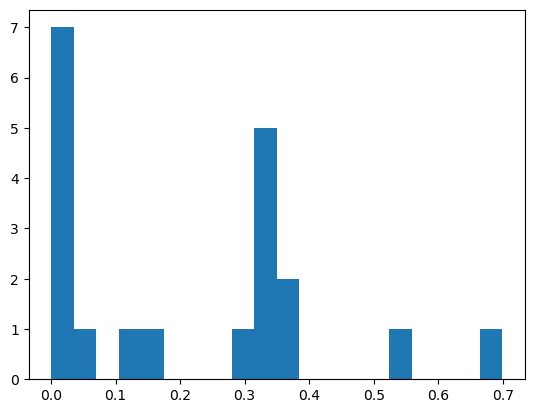

In [21]:
plt.hist(meet, bins = 20)
plt.show()

In [22]:
import scipy.stats as ss

#more than one row
meet_scaled = []
needy = []

tol_spiral = [1e-1, 1e-02, 1e-04, 1e-08, 1e-16]

def convergence():
    for cn in clean_noise:
        for a,b in zip(clean_noise[0],clean_noise[1]):
            for g,d in zip(a,b):
                if np.isclose(g,d, rtol=tol_spiral[1], atol=tol_spiral[4], equal_nan=False):
                    count = 1
                    while count < 50:
                        goal = d + abs(g - d)
                        #add more lines here--got to goal, but I need iters, given further actions by datapoints as agents
                        meet_scaled.append(goal)
                        count += 1


def disturbance():
    for cn in clean_noise:
        for a,b in zip(clean_noise[0],clean_noise[1]):
            for g,d in zip(a,b):
                if np.isclose(g,d, rtol=tol_spiral[0], atol=tol_spiral[1], equal_nan=False):
                    goal = d - abs(g - d)
                    meet_scaled.append(goal)
                else:
                    needy.append(d)

In [23]:
def allocate():
    ranks = ss.rankdata([i for i in clean_noise[1]])
    if ranks.any() < 10:
        ss.rankdata([i for i in meet_scaled])
        disturbance()
    else:
        ss.rankdata([i for i in meet_scaled])#assign ranks for closeness to goals
        convergence()

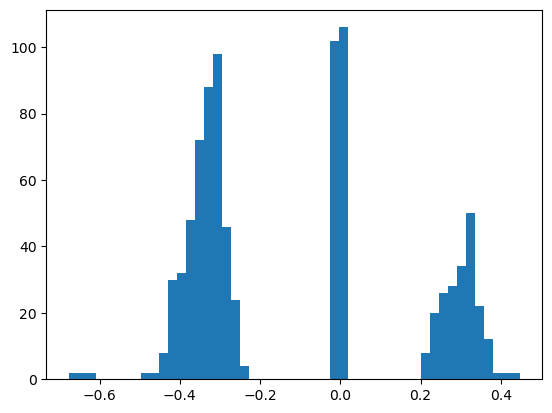

In [24]:
allocate()

plt.hist(meet_scaled, bins = 50)
plt.show()

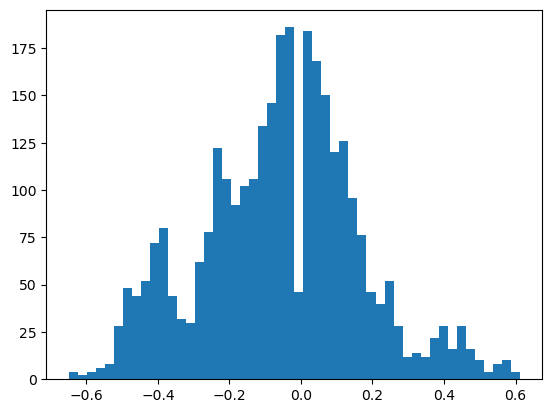

In [25]:
plt.hist(needy, bins = 50)
plt.show()

In [26]:
LIN_SCALE = 0.1
EXP_SCALE = 2.0
SIG_SCALE = 0.0

from numpy.random import default_rng

rng = default_rng(3)

In [27]:
minimum = np.min(needy)

helped = np.array(needy)

noise = rng.normal(scale=SIG_SCALE, size=helped.shape[0])
noise[-1] = 0.0
ran_seq = (
    ((np.arange(helped.shape[0])[::-1] * LIN_SCALE) ** EXP_SCALE) + noise
) + minimum


(array([437., 180., 139., 117., 103.,  93.,  86.,  79.,  75.,  71.,  67.,
         65.,  62.,  59.,  57.,  56.,  53.,  52.,  51.,  50.,  48.,  47.,
         46.,  45.,  44.,  43.,  43.,  41.,  41.,  40.,  40.,  38.,  39.,
         37.,  38.,  36.,  36.,  36.,  35.,  35.,  34.,  34.,  33.,  33.,
         33.,  33.,  32.,  31.,  31.,  32.]),
 array([-6.48988950e-01,  1.90279601e+03,  3.80624101e+03,  5.70968601e+03,
         7.61313101e+03,  9.51657601e+03,  1.14200210e+04,  1.33234660e+04,
         1.52269110e+04,  1.71303560e+04,  1.90338010e+04,  2.09372460e+04,
         2.28406910e+04,  2.47441360e+04,  2.66475810e+04,  2.85510260e+04,
         3.04544710e+04,  3.23579160e+04,  3.42613610e+04,  3.61648060e+04,
         3.80682510e+04,  3.99716960e+04,  4.18751410e+04,  4.37785860e+04,
         4.56820310e+04,  4.75854760e+04,  4.94889210e+04,  5.13923660e+04,
         5.32958110e+04,  5.51992560e+04,  5.71027010e+04,  5.90061460e+04,
         6.09095910e+04,  6.28130360e+04,  6.47164

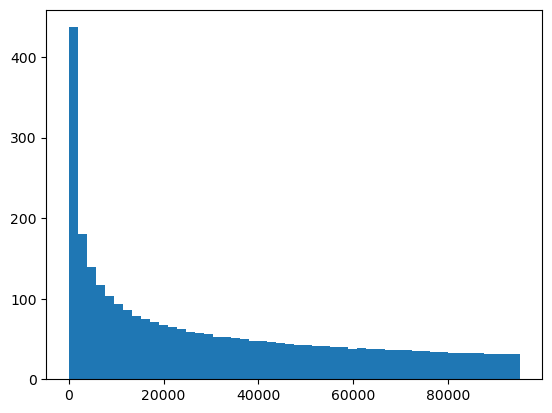

In [28]:
plt.hist(ran_seq, bins = 50)

#iter required to help all x-axis?

In [34]:
ran_train = ran_seq[1:100]

X = ran_train
pca = PCA(1)

X = X.reshape(-1, 1)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


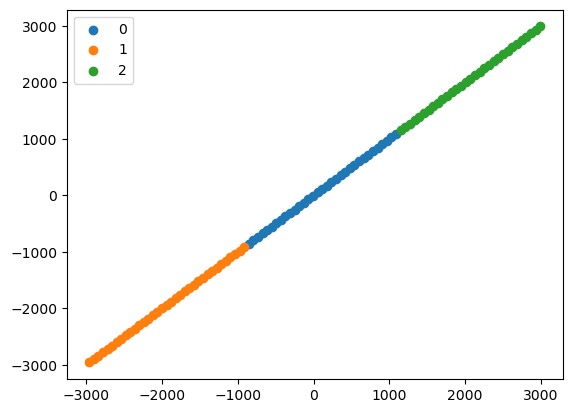

In [36]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i] , label = i)
plt.legend()
plt.show()

In [38]:
needy_train = needy[1:100]

X = np.array(needy_train)
pca = PCA(1)

X = X.reshape(-1, 1)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[0 0 2 1 1 2 2 1 2 0 0 1 1 0 1 0 0 1 2 0 0 1 0 1 0 0 0 0 1 1 2 0 0 0 2 0 1
 2 1 1 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 1 2 1 0 1 1 0 2 0 0 2 0 1 0 1 1 0 0 0
 0 1 2 0 2 2 1 1 2 1 0 0 0 1 2 0 0 1 0 0 1 1 2 2 0]


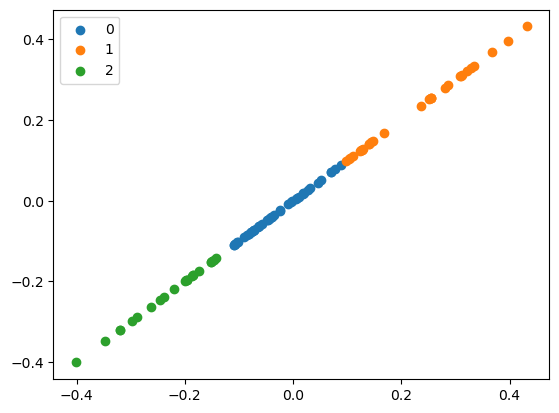

In [39]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i] , label = i)
plt.legend()
plt.show()

In [42]:
clean_train = [i for i in clean_noise[1]][1:100]

X = clean_train
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape


kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)

label = kmeans.fit_predict(df)
 
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 2 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


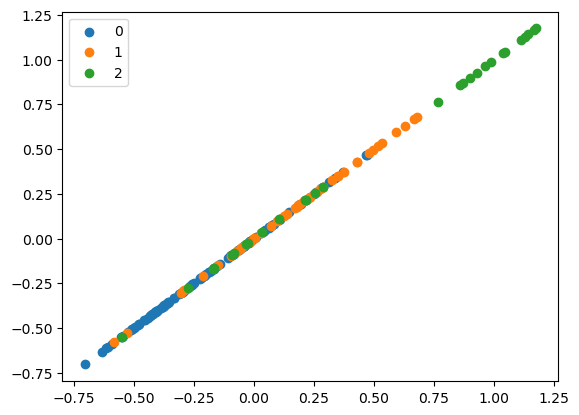

In [44]:
#PLOT TRAIN

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i] , df[label == i] , label = i)
plt.legend()
plt.show()